In [2]:
# Importazione delle librerie essenziali
import pandas as pd  # Gestione dei dati con DataFrame
import numpy as np

# Librerie per la visualizzazione dei dati
import plotly.graph_objects as go  # Visualizzazioni interattive avanzate
import plotly.subplots as sp  # Creazione di subplots interattivi
import seaborn as sns  # Grafici statistici
import matplotlib.pyplot as plt  # Grafici statici

# Librerie aggiuntive per l'analisi e la formattazione dei dati
import numpy as np  # Operazioni numeriche
import scipy.interpolate as spi  # Interpolazione e smoothing delle curve
import matplotlib.ticker as mtick  # Formattazione degli assi


# Importazione delle librerie necessarie
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Configurazione per visualizzare tutte le colonne nei DataFrame
pd.set_option('display.max_columns', None)

# Impostare la visualizzazione dei numeri in formato normale
pd.set_option('display.float_format', '{:.0f}'.format)

In [3]:
# List of CSV filenames
lista_nomi = ["inf_comunali.csv", "inf_cronologia_edifici.csv", "inf_età.csv", "inf_famiglie.csv",  
              "inf_interni.csv", "inf_numero_di_piani.csv", "inf_parrocchie.csv", "inf_provinciali.csv",  
              "inf_redditi_01.csv", "inf_redditi_02.csv", "inf_redditi_03.csv", "inf_regioni.csv",  
              "inf_scolarizzazione.csv", "inf_scuole.csv", "inf_settori.csv", "inf_stranieri.csv",  
              "informazioni_geografiche.csv", "Errori.csv"]

# Dictionary to hold DataFrames
dfs = {}

# Loop to load each CSV file
for df_name in lista_nomi:
    try:
        # Load the CSV into a DataFrame and clean the name for the dictionary key
        df_key = str(df_name).replace("inf_", "").replace(".csv", "")
        dfs[df_key] = pd.read_csv(f'data cleaning/{df_name}')
    except FileNotFoundError:
        print(f"File {df_name} not found. Skipping.")
    except pd.errors.EmptyDataError:
        print(f"File {df_name} is empty. Skipping.")
    except Exception as e:
        print(f"Error processing {df_name}: {e}")

# Check the dictionary
print(dfs.keys())

File informazioni_geografiche.csv not found. Skipping.
File Errori.csv not found. Skipping.
dict_keys(['comunali', 'cronologia_edifici', 'età', 'famiglie', 'interni', 'numero_di_piani', 'parrocchie', 'provinciali', 'redditi_01', 'redditi_02', 'redditi_03', 'regioni', 'scolarizzazione', 'scuole', 'settori', 'stranieri'])


In [4]:
def grafico_barre(df_plot, colonna_x, colonna_y, titolo, figsize=(12, 7), mostra_media=False, descrizione=None, orientazione='vertical'):
    # Stile di seaborn
    sns.set_style("whitegrid")
    
    # Crea la figura con la dimensione specificata
    plt.figure(figsize=figsize)
    
    # Imposta l'orientazione del grafico
    if orientazione == 'vertical':
        ax = sns.barplot(x=colonna_x, y=colonna_y, data=df_plot, color='#3498db', edgecolor='black')
        plt.xticks(rotation=45, ha='right', fontsize=12)
        for index, value in enumerate(df_plot[colonna_y]):
            ax.text(index, value + 0.5, str(value), ha='center', fontsize=12, fontweight='bold')
        plt.xlabel(colonna_x, fontsize=14)
        plt.ylabel(f'{colonna_y} Media', fontsize=14)
    else:
        ax = sns.barplot(y=colonna_x, x=colonna_y, data=df_plot, color='#3498db', edgecolor='black')
        plt.yticks(fontsize=12)
        for index, value in enumerate(df_plot[colonna_y]):
            ax.text(value + 0.5, index, str(value), va='center', fontsize=12, fontweight='bold')
        plt.ylabel(colonna_x, fontsize=14)
        plt.xlabel(f'{colonna_y} Media', fontsize=14)
    
    # Aggiunge una linea tratteggiata per la media se richiesto
    if mostra_media:
        media_valore = df_plot[colonna_y].mean()
        if orientazione == 'vertical':
            plt.axhline(media_valore, color='red', linestyle='dashed', linewidth=2, label=f'Media: {media_valore:.2f}')
        else:
            plt.axvline(media_valore, color='red', linestyle='dashed', linewidth=2, label=f'Media: {media_valore:.2f}')
        plt.legend(fontsize=12)
    
    # Migliora il design
    plt.title(titolo, fontsize=16, fontweight='bold')
    plt.grid(axis='y' if orientazione == 'vertical' else 'x', linestyle='--', alpha=0.7)
    
    # Aggiunge la descrizione sotto il grafico se presente
    if descrizione:
        plt.figtext(0.5, -0.1, descrizione, wrap=True, horizontalalignment='center', fontsize=10, color='dimgray')
    
    # Mostra il grafico
    plt.show()

---

## Classificazione sviluppo economico nei comuni

### **Parametri Utilizzati per la Classificazione dei Comuni**  

Per classificare i comuni in **"Male da Vivere", "Buono da Vivere" e "Ottimo da Vivere"**, abbiamo considerato diversi indicatori chiave della qualità della vita. Ogni parametro ha un impatto positivo o negativo sul punteggio complessivo del comune.  

---

### **1. Reddito Medio Annuale (€)**
- **Parametro chiave per il benessere economico dei cittadini.**  
- Comuni con **reddito alto** (sopra il 75° percentile) ottengono un punteggio positivo.  
- Comuni con **reddito basso** (sotto il 25° percentile) ricevono un punteggio negativo.  

**Motivazione:** Un reddito medio più alto indica una migliore qualità della vita, maggiore accesso ai servizi e più opportunità economiche.  

---

### **2. Tasso di Analfabetismo**
- **Indicatore della qualità dell’istruzione e delle opportunità lavorative.**  
- Comuni con **basso analfabetismo** (sotto il 25° percentile) ricevono un punteggio positivo.  
- Comuni con **alto analfabetismo** (sopra il 75° percentile) ottengono un punteggio negativo.  

**Motivazione:** Un alto tasso di analfabetismo può limitare le opportunità economiche e la qualità della forza lavoro.  

---

### **3. Età Media della Popolazione**
- **Misura l’invecchiamento della popolazione.**  
- Comuni con **età media giovane** (sotto il 25° percentile) ricevono un punteggio positivo.  
- Comuni con **età media alta** (sopra il 75° percentile) ricevono un punteggio negativo.  

**Motivazione:** Una popolazione giovane indica una maggiore forza lavoro disponibile e dinamismo economico.  

---

### **4. Settori Economici Attivi**
- **Rappresenta la solidità del mercato del lavoro.**  
- Se la somma di **Industria Addetti (%) + Servizi Addetti (%)** è alta (sopra il 75° percentile), il comune riceve un punteggio positivo.  

**Motivazione:** Un'economia forte con una buona occupazione nei settori industriali e dei servizi garantisce stabilità economica.  

---

### **5. Imposta Netta Annuale (€)**
- **Misura il livello di tassazione assoluto nel comune.**  
- Se l’imposta è **alta** (sopra il 75° percentile), il comune ottiene un punteggio negativo.  
- Se l’imposta è **bassa** (sotto il 25° percentile), il comune ottiene un punteggio positivo.  

**Motivazione:** Un'elevata imposizione fiscale riduce il reddito disponibile dei cittadini, mentre un carico fiscale più leggero è vantaggioso.  

---

### **6. Percentuale di Imposta sul Reddito**
- **Misura l’incidenza delle tasse sul reddito medio.**  
- Se la **percentuale è alta** (sopra il 75° percentile), il comune ottiene un punteggio negativo.  
- Se la **percentuale è bassa** (sotto il 25° percentile), il comune ottiene un punteggio positivo.  

**Motivazione:** Un comune con una pressione fiscale più bassa lascia più reddito disponibile ai cittadini, migliorando la qualità della vita.  

---

### **Classificazione Finale**
Dopo aver assegnato un punteggio a ciascun comune in base ai parametri sopra elencati:  
- **Ottimo da Vivere** → Punteggio alto (≥3)  
- **Buono da Vivere** → Punteggio medio (0-2)  
- **Male da Vivere** → Punteggio basso (<0)  

Questa classificazione permette di valutare i comuni in modo oggettivo, considerando sia fattori economici che sociali. Se vuoi aggiungere altri criteri, possiamo perfezionare il modello! 🚀

In [5]:
def classificazione_comuni(df):
    # Calcolo della percentuale di imposta sul reddito annuale
    df["Percentuale Imposta"] = (df["Imposta netta annuale (€)"] / df["Media annuale (Redditi €)"]) * 100
    
    # Calcolo dei percentili per definire le soglie
    soglie = {
        "reddito": {
            "basso": df["Media annuale (Redditi €)"].quantile(0.25),
            "alto": df["Media annuale (Redditi €)"].quantile(0.75)
        },
        "analfabetismo": {
            "basso": df["Analfabeti"].quantile(0.25),
            "alto": df["Analfabeti"].quantile(0.75)
        },
        "età": {
            "giovane": df["Età (Media)"].quantile(0.25),
            "anziana": df["Età (Media)"].quantile(0.75)
        },
        "settori_economici": {
            "forte": (df["Industria Addetti (%)"] + df["Servizi Addetti (%)"]).quantile(0.75)
        },
        "imposte": {
            "bassa": df["Imposta netta annuale (€)"].quantile(0.25),
            "alta": df["Imposta netta annuale (€)"].quantile(0.75)
        },
        "percentuale_imposta": {
            "bassa": df["Percentuale Imposta"].quantile(0.25),
            "alta": df["Percentuale Imposta"].quantile(0.75)
        }
    }
    
    # Funzione per classificare i comuni
    def assegna_categoria(row):
        punteggio = 0
        
        # Reddito
        if row["Media annuale (Redditi €)"] >= soglie["reddito"]["alto"]:
            punteggio += 2
        elif row["Media annuale (Redditi €)"] < soglie["reddito"]["basso"]:
            punteggio -= 2
        
        # Analfabetismo
        if row["Analfabeti"] <= soglie["analfabetismo"]["basso"]:
            punteggio += 1
        elif row["Analfabeti"] >= soglie["analfabetismo"]["alto"]:
            punteggio -= 1
        
        # Età Media
        if row["Età (Media)"] <= soglie["età"]["giovane"]:
            punteggio += 1
        elif row["Età (Media)"] >= soglie["età"]["anziana"]:
            punteggio -= 1
        
        # Settori Economici
        if (row["Industria Addetti (%)"] + row["Servizi Addetti (%)"]) >= soglie["settori_economici"]["forte"]:
            punteggio += 1
        
        # Imposte
        if row["Imposta netta annuale (€)"] >= soglie["imposte"]["alta"]:
            punteggio -= 1
        elif row["Imposta netta annuale (€)"] <= soglie["imposte"]["bassa"]:
            punteggio += 1
        
        # Percentuale di imposta
        if row["Percentuale Imposta"] >= soglie["percentuale_imposta"]["alta"]:
            punteggio -= 1
        elif row["Percentuale Imposta"] <= soglie["percentuale_imposta"]["bassa"]:
            punteggio += 1
        
        # Classificazione finale
        if punteggio >= 3:
            return "Ottimo"
        elif punteggio >= 0:
            return "Buono"
        else:
            return "Male"
    
    # Applicazione della funzione
    df["Classificazione"] = df.apply(assegna_categoria, axis=1)
    
    return df#[["Comune", "Classificazione"]]

# Esempio di utilizzo (supponendo che il dataframe sia caricato come 'df')
df_risultato = classificazione_comuni(dfs['comunali'])
df_risultato.head()

,Municipio,Provincia,Distanza dal capoluogo (Km),Comune,Regione,Zona,sigla_provincia,Abitanti,Età (Media),Parrocchie,Parrrocchiani,Totale di stranieri,Scuole,Diplomati,Laureati,Licenza Elementare Totale,Liscenziati Midia Totale,Alfabeti,Analfabeti,Industria Addetti (%),Servizi Addetti (%),Amministrazione Addetti (%),Altro Addetti (%),Media annuale (Redditi €),Media Mensile (Redditi €),Imposta netta annuale (€),Imposta netta mensile (€),Percentuale Imposta,Classificazione
0,Piazza Pirandello,Agrigento,0,Agrigento,Sicilia,Sud,AG,5977,43,31,4550,1334,95,10581,4890,5009,7561,2327,593,0,0,1,0,19432,1619,4935,411,25,Male
1,Piazza Liberta 1,Alessandria,0,Alessandria,Piemonte,Nord,AL,93943,46,33,3694,7906,51,19306,7971,11240,18321,3575,577,1,1,0,1,23940,1995,5247,437,22,Buono
2,Piazza XXIV Maggio 1,Ancona,0,Ancona,Marche,Centro,AN,100861,45,34,3904,10521,7,29093,15122,15452,19995,5424,289,1,1,1,2,22704,1892,5594,466,25,Buono
3,Piazza Chanoux 1,Aosta,0,Aosta,Valle d'Aosta,Sconosciuto,Sconosciuto,3439,46,9,36,2589,8,8578,4298,5951,9630,1943,224,0,0,1,1,26247,2187,5492,458,21,Buono
4,Piazza Liberta` 1,Arezzo,0,Arezzo,Toscana,Centro,AR,99543,45,62,7311,9184,92,24174,10800,13556,18871,4693,302,2,1,1,1,20696,1725,5167,431,25,Male


In [6]:
# Stampare i risultati finali
display(pd.DataFrame(df_risultato[['Comune', 'Classificazione']].Classificazione.value_counts()))

,count
Classificazione,
Buono,3736
Male,2527
Ottimo,1031


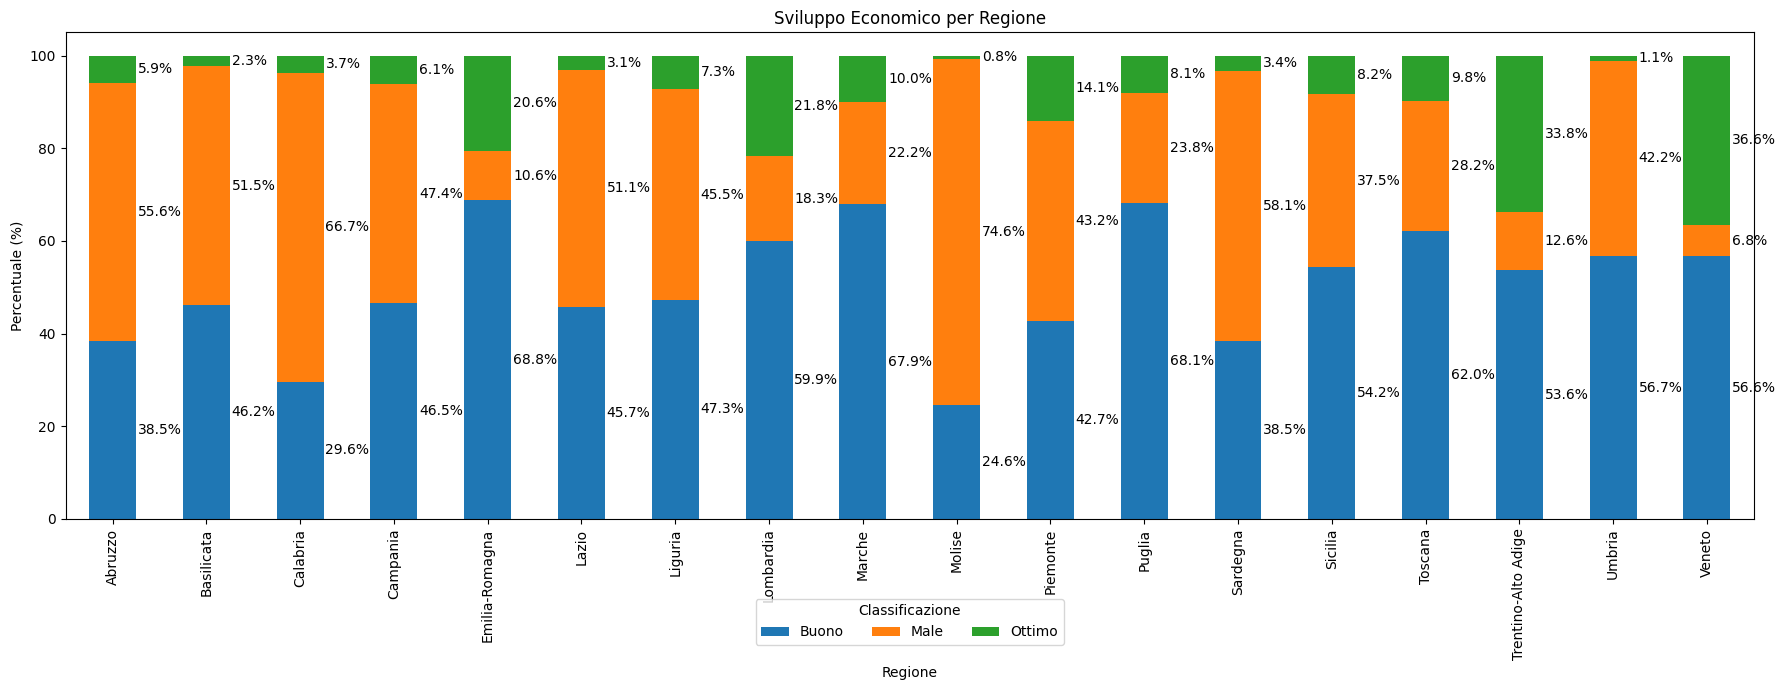

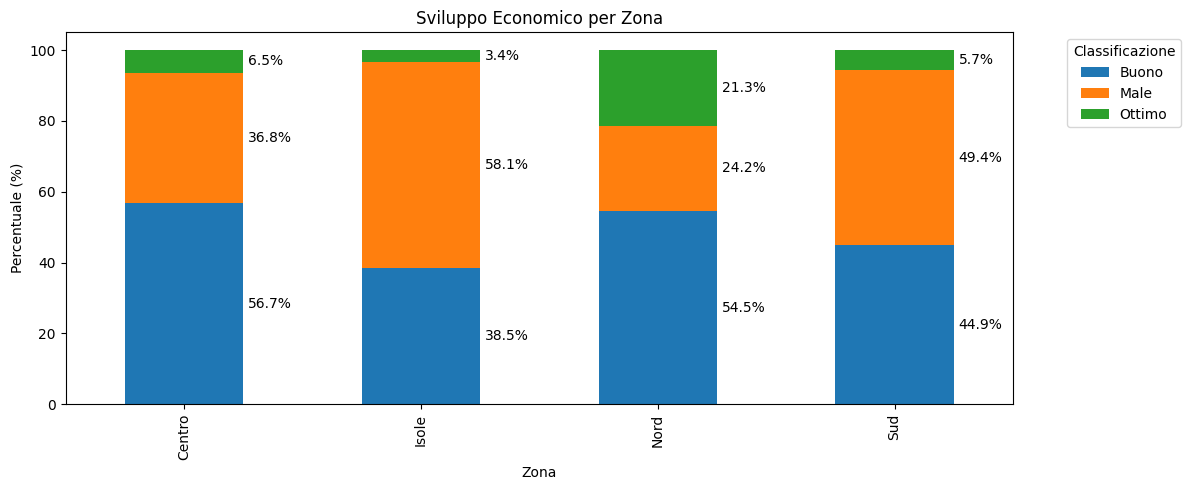

In [7]:
def grafico_classificazione(titolo: str, df_classificazione, luogo, larghezza=10, altezza=6, mostra_valori=True, legenda_in_basso=False):
    # Raggruppiamo nuovamente per Zona e Classificazione e calcoliamo le percentuali
    classification_counts = df_classificazione.groupby([luogo, 'Classificazione']).size().unstack(fill_value=0)
    classification_percentage = classification_counts.div(classification_counts.sum(axis=1), axis=0) * 100

    # Creiamo il grafico a barre con le dimensioni personalizzabili
    ax = classification_percentage.plot(kind='bar', stacked=True, figsize=(larghezza, altezza))

    # Aggiungiamo etichette e titolo
    ax.set_ylabel('Percentuale (%)')
    ax.set_title(titolo)

    # Se l'utente vuole mostrare i valori, aggiungiamo i numeri accanto alle barre
    if mostra_valori:
        for p in ax.patches:
            height = p.get_height()
            width = p.get_width()
            x = p.get_x() + width + 0.02  # Aumentiamo il valore per spostare il testo più lontano
            y = p.get_y() + height / 2  # Posizione Y del testo (al centro della sezione)
            ax.text(x, y, f'{height:.1f}%', ha='left', va='center')

    # Aggiungiamo la legenda, se l'opzione `legenda_in_basso` è True, la spostiamo in basso
    if legenda_in_basso:
        ax.legend(title='Classificazione', bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=3)
    else:
        ax.legend(title='Classificazione', bbox_to_anchor=(1.05, 1), loc='upper left')

    # Mostriamo il grafico
    plt.tight_layout()
    plt.show()

# Rinominiamo "Ovest" in "Isole"
df_risultato['Zona'] = df_risultato['Zona'].replace('Ovest', 'Isole')
df_risultato = df_risultato[df_risultato['Zona'] != "Sconosciuto"]

# Esempio di chiamata alla funzione con l'opzione di spostare la legenda in basso
grafico_classificazione('Sviluppo Economico per Regione', df_risultato, 'Regione', larghezza=18, altezza=7, mostra_valori=True, legenda_in_basso=True)

# Esempio di chiamata alla funzione con la legenda in alto (comportamento predefinito)
grafico_classificazione('Sviluppo Economico per Zona', df_risultato, 'Zona', larghezza=12, altezza=5, mostra_valori=True, legenda_in_basso=False)


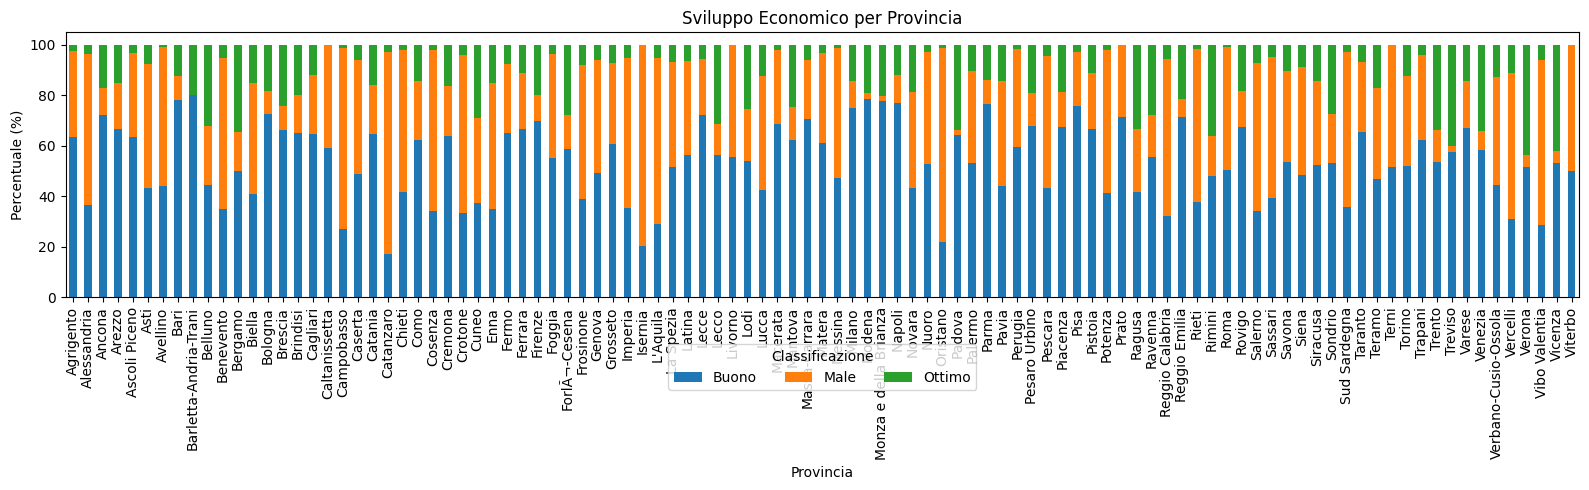

In [8]:
# Esempio di chiamata alla funzione con la legenda in alto (comportamento predefinito)
grafico_classificazione('Sviluppo Economico per Provincia', df_risultato, 'Provincia', larghezza=16, altezza=5, mostra_valori=False, legenda_in_basso=True)


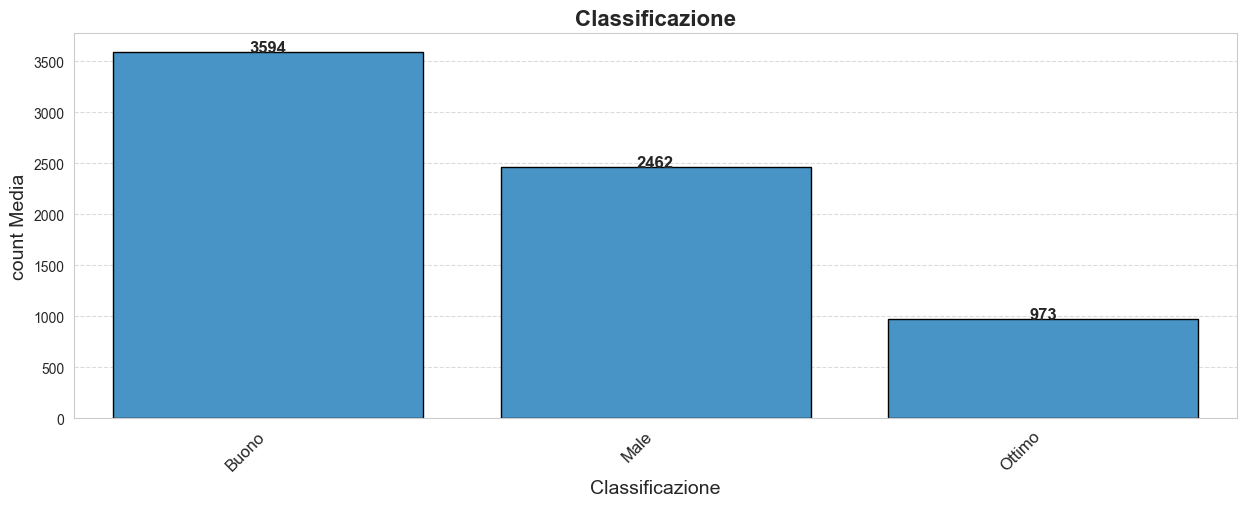

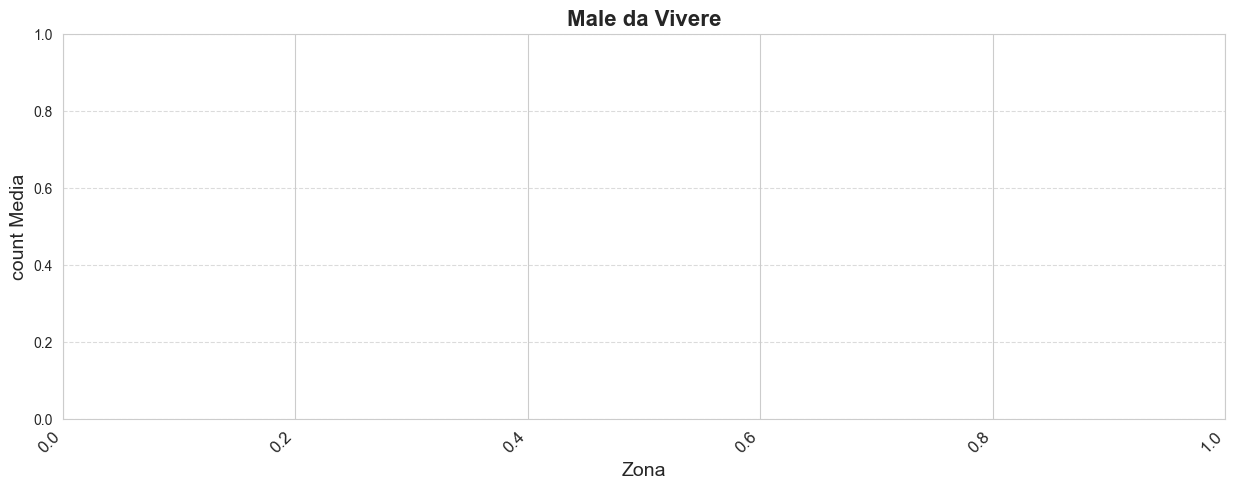

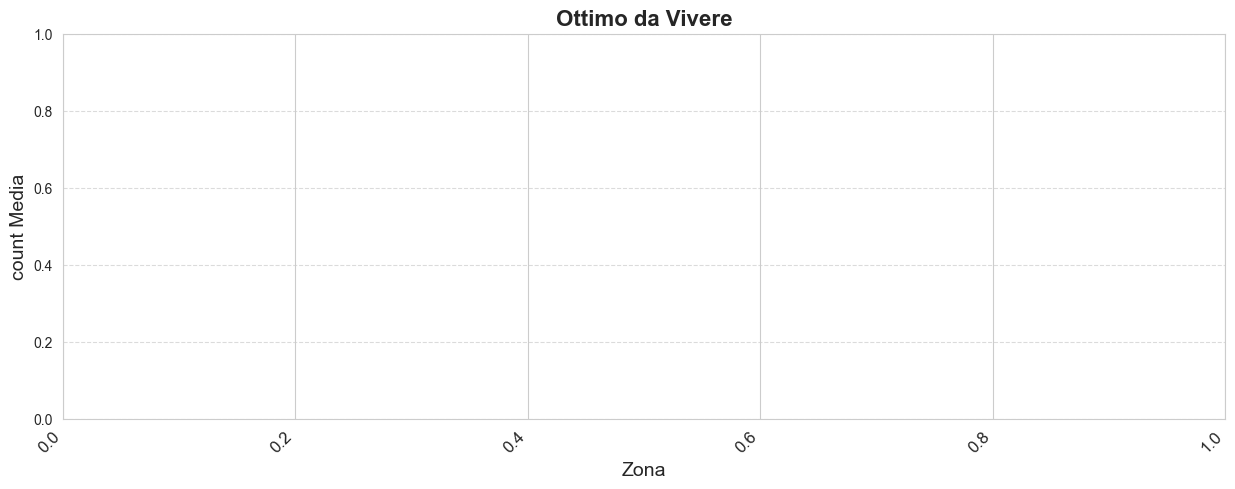

In [9]:
grafico_barre(pd.DataFrame(df_risultato[['Comune', 'Classificazione']].Classificazione.value_counts()), 
              'Classificazione', 'count', 'Classificazione', figsize=(15, 5))

grafico_barre(pd.DataFrame(df_risultato[(df_risultato['Classificazione'] == 'Male da Vivere') & (df_risultato['Zona'] != "Sconosciuto")]['Zona'].value_counts()), 
              'Zona', 'count', 'Male da Vivere', figsize=(15, 5))

grafico_barre(pd.DataFrame(df_risultato[(df_risultato['Classificazione'] == 'Ottimo da Vivere') & (df_risultato['Zona'] != "Sconosciuto")]['Zona'].value_counts()), 
              'Zona', 'count', 'Ottimo da Vivere', figsize=(15, 5))